<a href="https://colab.research.google.com/github/ndungu96/Moringa_DS_Core_WK7_IP_2022_10/blob/main/Moringa_DS_Core_WK7_IP_2022_10_Peter_Karuku_Autolib_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Autolib Hypothesis Testing Report**

https://docs.google.com/document/d/1ulmEWTdq-0ZSqVZKCX_Gr1hflQzjBXODHrnS9iiUJYo/edit?usp=sharing

#**Autolib Electric Car-Sharing Service Company**

##**[1] DEFINING THE QUESTION**

###**a) Specifying the Data Analytic Question**

I will work for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

###**b) Defining the Metric for Success**

In order to be successful I need to be able to reject or fail to reject our hypothesis.

###**c) Understanding the context** 

Autolib' was an electric car sharing service which was inaugurated in Paris, France, in December 2011. It closed on 31 July 2018. It was operated by the Bolloré industry and complemented the city's bike sharing system, Velib', which was set up in 2007. 

In order to investigate a claim about the blue cars from the provided Autolib dataset, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”.

###**d) Data Relevance**

The dataset and glossary to use for this project can be found here [https://bit.ly/DSCoreAutolibDataset].

The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging).

##**Importing Libraries**

In [112]:
#Importing pandas
import pandas as pd

# Importing Numpy
import numpy as np

# Importing Seaborn
import seaborn as sns

# Importing Matplotlib
import matplotlib.pyplot as plt

# Importing scipy.stats
import scipy.stats as stats

from statsmodels.stats import weightstats as stests

from scipy.stats import shapiro

from scipy.stats import ttest_ind

##**[2] READING THE DATASET**

In [87]:
# Loading the dataset

df = pd.read_csv("https://bit.ly/DSCoreAutolibDataset")
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


##**[3] REVIEWING THE DATASET**

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [89]:
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [90]:

df.shape

(16085, 13)

There are 16085 rows and 13 columns

In [91]:
#checking for duplicates
df.duplicated().any()

False

There are no duplicates

In [92]:
#checking for null values
df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

There are no null values

##**[4] CLEANING THE DATASET**

In [93]:
# Removing spaces from the column names and replacing it with an underscore
df.columns = df.columns.str.replace(" ","_")


In [94]:
# Changing the names of the columns to lowercase
df.columns = map(str.lower, df.columns)

In [95]:
list(df.columns)

['postal_code',
 'date',
 'n_daily_data_points',
 'dayofweek',
 'day_type',
 'bluecars_taken_sum',
 'bluecars_returned_sum',
 'utilib_taken_sum',
 'utilib_returned_sum',
 'utilib_14_taken_sum',
 'utilib_14_returned_sum',
 'slots_freed_sum',
 'slots_taken_sum']

In [100]:
#Droppig the columns that we won't need in our analysis
df.drop(columns = ['utilib_taken_sum','utilib_returned_sum','utilib_14_taken_sum','utilib_14_returned_sum'], axis =1, inplace = True)
df.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'slots_freed_sum',
       'slots_taken_sum'],
      dtype='object')

The columns that belong to the Utilib and Utilib 14 cars won't be used in the analysis is of the blue cars 

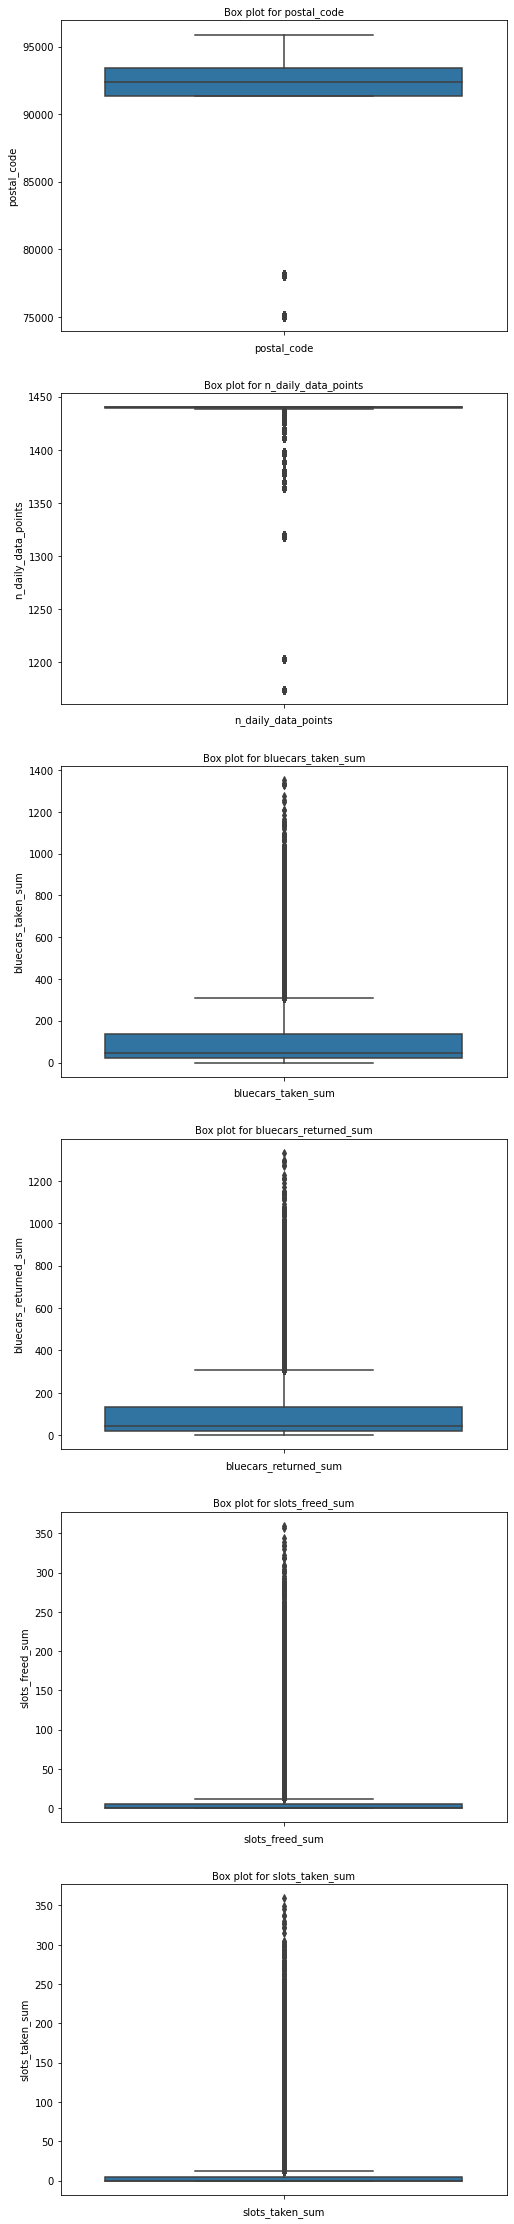

In [101]:
#Checking for outliers
col_names = ['postal_code','n_daily_data_points','bluecars_taken_sum','bluecars_returned_sum','slots_freed_sum','slots_taken_sum']
fig,ax = plt.subplots(len(col_names),figsize=(8,40))
for i , col_val in enumerate(col_names):
  sns.boxplot(y=df[col_val],ax=ax[i])
  ax[i].set_title('Box plot for {}'.format(col_val), fontsize =10)
  ax[i].set_xlabel(col_val,fontsize=10)
plt.show()

There are outliers in each of the variables. The outliers are a huge part of our dataset. No need to remove them.

##**[5] EXPLORATORY ANALYSIS**

###**a) UNIVARIATE ANALYSIS**

####**Measures of Central Tendency**

Mean

In [22]:
# Mean of bluecars_returned_sum
df["bluecars_returned_sum"].mean()

125.912713708424

In [23]:
# Mean of bluecars_taken_sum
df["bluecars_taken_sum"].mean()

125.92695057506994

Mode

In [ ]:
# Mode of bluecars_taken_sum
df["bluecars_taken_sum"].mode()

0    12
dtype: int64

In [ ]:
# Mode of bluecars_returned_sum
df["bluecars_returned_sum"].mode()

0    13
dtype: int64

Median

In [ ]:
# Median of bluecars_taken_sum
df["bluecars_returned_sum"].median()

46.0

In [17]:
# Median of bluecars_taken_sum
df["bluecars_taken_sum"].median()

46.0

#### Measures of dispersion

Standard Deviation

In [24]:
# Standard Deviation of bluecars_taken_sum
df["bluecars_taken_sum"].std()

185.42657876727876

In [25]:
# Standard Deviation of bluecars_returned_sum
df["bluecars_returned_sum"].std()

185.50153480148342

Variance

In [26]:
# Variance of bluecars_taken_sum
df["bluecars_taken_sum"].var()

34383.01611333783

In [27]:
# Variance of bluecars_taken_sum
df["bluecars_returned_sum"].var()

34410.81941370596

Range

In [28]:
# Range of bluecars_taken_sum
ra_max = df["bluecars_taken_sum"].max()
ra_min = df["bluecars_taken_sum"].min()
ra_max - ra_min

1352

In [29]:
# Range of bluecars_taken_sum
ra_max = df["bluecars_returned_sum"].max()
ra_min = df["bluecars_returned_sum"].min()
ra_max - ra_min

1332

Quantiles

In [30]:
# Quantile of bluecars_taken_sum
df["bluecars_taken_sum"].quantile([0.25,0.5,0.75])

0.25     20.0
0.50     46.0
0.75    135.0
Name: bluecars_taken_sum, dtype: float64

In [31]:
# Quantile of bluecars_returned_sum
df["bluecars_returned_sum"].quantile([0.25,0.5,0.75])

0.25     20.0
0.50     46.0
0.75    135.0
Name: bluecars_returned_sum, dtype: float64

Skewness

In [32]:
# Skewness of bluecars_taken_sum
df["bluecars_taken_sum"].skew()

2.4063548974959086

In [33]:
# Skewness of bluecars_taken_sum
df["bluecars_returned_sum"].skew()

2.412084978838923

Kurtosis

In [34]:
# Kurtosis of bluecars_taken_sum
df['bluecars_taken_sum'].kurt()

6.172692305510042

In [35]:
# Kurtosis of respondent age
df['bluecars_returned_sum'].kurt()

6.1862880957582345


*   The skewness is positive implying the distribution is skewed to the right.
*   The kurtosis is greater than zero hence this is a leptokurtic distribution implying that the distribution is heavy(outlier is present) and higher than that of a normal distribution





###**b) BIVARIATE ANALYSIS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


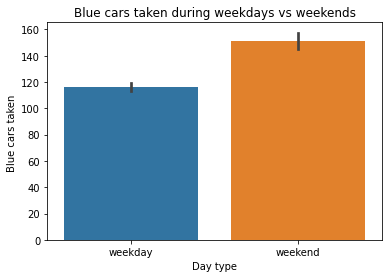

In [103]:
# A bar chart for the blue cars taken during different day types
sns.barplot(df['day_type'], df['bluecars_taken_sum'])
plt.title('Blue cars taken during weekdays vs weekends')
plt.xlabel('Day type')
plt.ylabel('Blue cars taken ')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


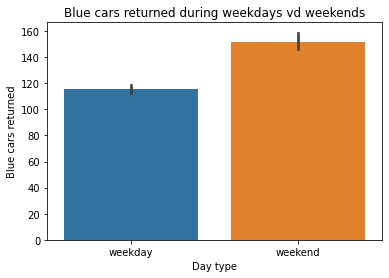

In [104]:
# A bar chart for the blue cars returned during different day types

sns.barplot(df['day_type'], df['bluecars_returned_sum'])
plt.title('Blue cars returned during weekdays vd weekends')
plt.xlabel('Day type')
plt.ylabel('Blue cars returned')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


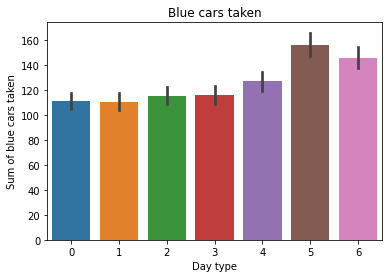

In [105]:
# A barplot of the sum of the blue cars taken throughout the week
sns.barplot(df['dayofweek'], df['bluecars_taken_sum'])
plt.title('Blue cars taken')
plt.xlabel('Day type')
plt.ylabel('Sum of blue cars taken')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


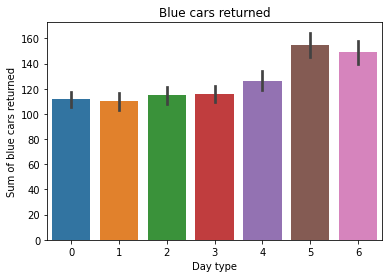

In [106]:
# A Bar plot for blue cars returned
sns.barplot(df['dayofweek'], df['bluecars_returned_sum'])
plt.title('Blue cars returned')
plt.xlabel('Day type')
plt.ylabel('Sum of blue cars returned')
plt.show()

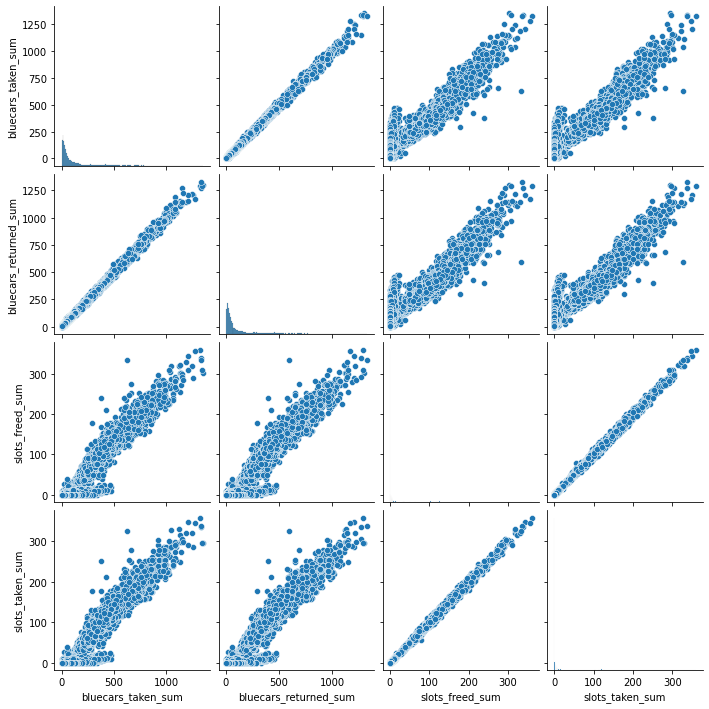

In [37]:
#PLotting a pairplot to show the different relations between different numerical variables
columns = ['bluecars_taken_sum','bluecars_returned_sum','slots_freed_sum','slots_taken_sum']
sns.pairplot(df[columns])

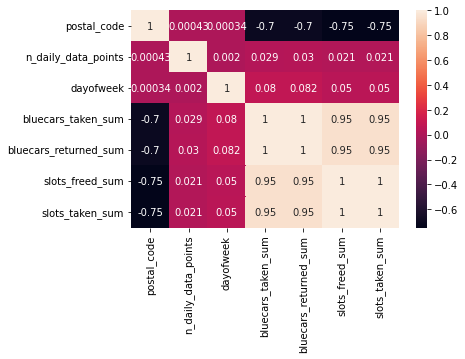

In [102]:
# A heatmap to show correlation between numerical variables
sns.heatmap(df.corr(), xticklabels = df.corr().columns, yticklabels = df.corr().columns, annot=True)

##**[6] HYPOTHESIS TESTING**

**H0(null hypothesis): μ1(mean of BlueCars taken on the weekday) = μ2(mean of BlueCars taken on the weekend)**

**H1(alternate hypothesis): μ1 ≠ μ2**

**The level of significance is 0.05**

In [110]:
# testing for normality for Bluecars Taken 
stat, p = shapiro(df['bluecars_taken_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))


alpha = 0.05
if p > alpha:
	print('The sample appears Gaussian')
else:
	print('The sample does not appear Gaussian')

Statistics=0.661, p=0.000
The sample does not appear Gaussian


In [111]:
# Getting the sums of bluecars on weekdays
weekday= df[(df['day_type']== 'weekday')]
d1 = weekday.bluecars_taken_sum
d1

0        110
1         98
2        138
3        104
4        114
        ... 
16078     12
16079     15
16080     15
16083     11
16084      2
Name: bluecars_taken_sum, Length: 11544, dtype: int64

In [113]:
# Getting the sums of bluecars on weekends
weekend = df[(df['day_type'] == 'weekend')]
d2 = weekend.bluecars_taken_sum
d2

5        187
6        180
12       224
13       193
19       217
        ... 
16068     36
16074     15
16075     34
16081     19
16082     33
Name: bluecars_taken_sum, Length: 4541, dtype: int64

In [118]:
#find variance for each group
print(np.var(d1), np.var(d2))
print('--------------------------------------------------------------')
print(np.var(d1) / np.var(d2))

28770.794309534725 47760.41976702903
--------------------------------------------------------------
0.6023982714112656


***0.602*** is less than four, therefore the assumption is that the variances of the two groups are equal

In [132]:
ttest,pval = ttest_ind(d1,d2)

print("The p-value is", pval)
print('---------------------------------------------------------------------------------------------------')
print("The value of the ttest is", ttest)

if pval > 0.05:
  print("We reject the Null Hypothesis")
else:
  print("We fail to reject the Null Hypothesis")

The p-value is 2.9687141189928577e-27
---------------------------------------------------------------------------------------------------
The value of the ttest is -10.833428743425204
We fail to reject the Null Hypothesis


##**[7] CONCLUSION**

In conclusion, we fail to reject the Null Hypothesis that the mean of Bluecars taken on weekdays is equal to the mean of Bluecars taken during the weekends because our p-value(2.96) is more than our level of significance of 0.05.